<a href="https://colab.research.google.com/github/Caculuz-cinks/black_faces_age_estimation/blob/main/UTK_Face_Age_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/laxmimerit/Image-Dataset-for-Age-Prediction.git

Cloning into 'Image-Dataset-for-Age-Prediction'...
remote: Enumerating objects: 47107, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 47107 (delta 0), reused 2 (delta 0), pack-reused 47104 (from 1)
Receiving objects: 100% (47107/47107), 1.37 GiB | 55.28 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (24110/24110), done.


In [ ]:
!pip install ktrain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 51.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 49.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 41.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 26.0 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.41.4-py3-none-any.whl size=25316932 sha256=cbd5f0400247

In [ ]:
%matplotlib inline
import os
import ktrain
from ktrain import vision as vis

In [ ]:
import re
pattern = r'([^/]+)_\d+_\d+_\d+.jpg$'

p = re.compile(pattern)

r = p.search('images/10_0_0_20170110220548521.jpg')

print(r.group(1))

10


In [ ]:
DATADIR = '/content/Image-Dataset-for-Age-Prediction/images'

In [ ]:
(train_data, test_data, preproc) = vis.images_from_fname(DATADIR, pattern = pattern, is_regression= True,
                      random_state = 42)


/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/53__0_20170116184028385.jpg -  skipping this file
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/39_1_20170116174525125.jpg -  skipping this file
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/61_1_20170109142408075.jpg -  skipping this file
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/24_0_1_20170116220224657 .jpg -  skipping this file
  warnings.warn(


['label']
       label
12304   28.0
6161     5.0
19807   30.0
21202   32.0
14941   35.0
['label']
       label
16139   33.0
14926   26.0
8979     1.0
12077   70.0
14568    8.0
Found 21690 validated image filenames.
Found 2411 validated image filenames.


/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/61_3_20170109150557335.jpg -  skipping this file
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:877: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:727: UserWarning: Task is being treated as REGRESSION because either class_names argument was not supplied or is_regression=True. If this is incorrect, change accordingly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:877: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  warnings.warn(


In [ ]:
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized) [https://arxiv.org/abs/1512.03385]
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized) [https://arxiv.org/abs/1704.04861]
pretrained_mobilenetv3: MobileNetV3-Small Neural Network (pretrained on ImageNet)
mobilenetv3: MobileNetV3-Small Neural Network (randomly initialized) [https://arxiv.org/abs/1905.02244]
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized) [http://arxiv.org/abs/1512.00567]
pretrained_efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet)
efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet) [https://arxiv.org/abs/1905.11946]
pretrained_efficientnetb7: EfficientNet-B7 Neural Network (pretrained on ImageNet)
efficientnetb7: EfficientNet-B7 Neural Network (pre

In [ ]:
model = vis.image_regression_model('pretrained_resnet50', train_data = train_data, val_data = test_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94765736/94765736 [==============================] - 0s 0us/step
pretrained_resnet50 model created.


In [ ]:
learner = ktrain.get_learner(model = model, train_data = train_data, val_data = test_data, batch_size = 64)

In [ ]:
#learning rate = 1e-4

In [ ]:
import fastai
print(fastai.__version__)

2.7.16


In [ ]:
learner.fit_onecycle(1e-4, 2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
339/339 [==============================] - 443s 1s/step - loss: 376.9265 - mae: 14.4439 - val_loss: 196.5063 - val_mae: 10.8564
Epoch 2/2
339/339 [==============================] - 430s 1s/step - loss: 173.6079 - mae: 10.0955 - val_loss: 169.5401 - val_mae: 10.0491


In [ ]:
learner.freeze(15)


learner.fit_onecycle(1e-4, 2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
339/339 [==============================] - 1249s 4s/step - loss: 106.9269 - mae: 7.7349 - val_loss: 136.6467 - val_mae: 8.4114
Epoch 2/2
339/339 [==============================] - 1236s 4s/step - loss: 47.5624 - mae: 5.1883 - val_loss: 65.6369 - val_mae: 5.8093


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
test_data.filenames[10:20]

['43_0_4_20170117135938595.jpg',
 '29_1_0_20170105172818813.jpg',
 '2_1_4_20170103213149252.jpg',
 '53_0_0_20170111202247097.jpg',
 '38_1_0_20170104201657730.jpg',
 '25_1_0_20170117140903569.jpg',
 '35_1_2_20170116175203095.jpg',
 '21_1_0_20170116220220347.jpg',
 '37_1_1_20170116204841022.jpg',
 '59_0_1_20170117192104465.jpg']

In [ ]:
def show_prediction(fname):
  fname = DATADIR + '/' + fname
  pred = round(predictor.predict_filename(fname)[0])
  actual = int(p.search(fname).group(1))
  vis.show_image(fname)
  print("Prredicted Age: %s | Actual Age: %s" % (pred, actual))

In [ ]:
from google.colab import files

# Upload an image
uploaded = files.upload()

# Get the filename of the uploaded image
filenames = list(uploaded.keys())
print(f"Uploaded file: {filenames}")

Saving 2_0_1_20180113184110994.jpg to 2_0_1_20180113184110994.jpg
Saving 12_0_1_20180113184110995.jpg to 12_0_1_20180113184110995.jpg
Saving 22_0_1_20180113184110991.jpg to 22_0_1_20180113184110991.jpg
Saving 28_1_1_20180113184110995.jpg to 28_1_1_20180113184110995.jpg
Saving 53_1_1_20180113184110993.jpg to 53_1_1_20180113184110993.jpg
Saving 80_0_1_20180113184110992.jpg to 80_0_1_20180113184110992.jpg
Uploaded file: ['2_0_1_20180113184110994.jpg', '12_0_1_20180113184110995.jpg', '22_0_1_20180113184110991.jpg', '28_1_1_20180113184110995.jpg', '53_1_1_20180113184110993.jpg', '80_0_1_20180113184110992.jpg']


In [ ]:
def real_prediction(image_path):
    # Predict the age using the predictor with the full image path
    pred = round(predictor.predict_filename(image_path)[0])

    # If you want to compare it with the actual age (assuming the age is in the filename):
    actual = int(p.search(image_path).group(1)) if p.search(image_path) else "N/A"

    # Display the image
    vis.show_image(image_path)

    # Print the predicted age and the actual age if available
    print("Predicted Age: %s | Actual Age: %s" % (pred, actual))

Predicted Age: 14 | Actual Age: 2


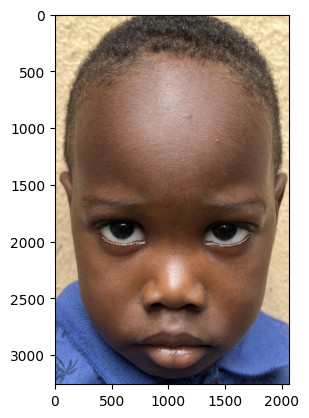

In [ ]:
real_prediction('2_0_1_20180113184110994.jpg')

Predicted Age: 21 | Actual Age: 12


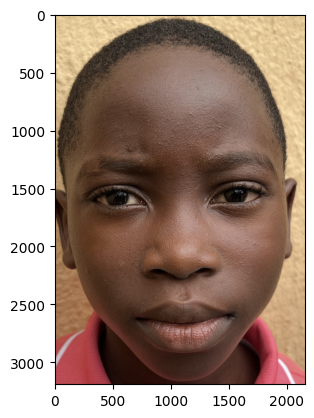

In [ ]:
real_prediction('12_0_1_20180113184110995.jpg')

Predicted Age: 43 | Actual Age: 22


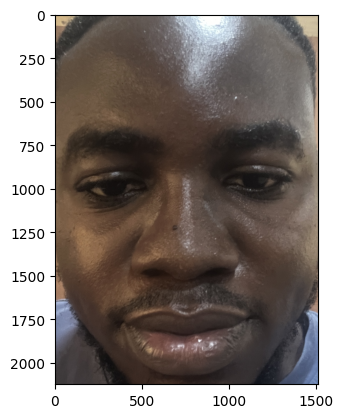

In [ ]:
real_prediction('22_0_1_20180113184110991.jpg')

Predicted Age: 33 | Actual Age: 28


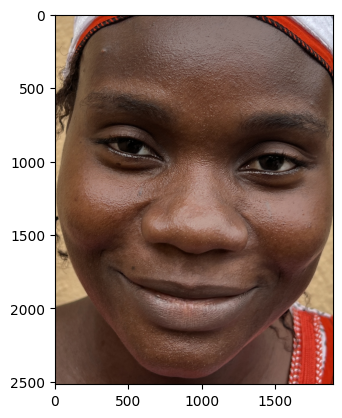

In [ ]:

real_prediction('28_1_1_20180113184110995.jpg')

Predicted Age: 53 | Actual Age: 53


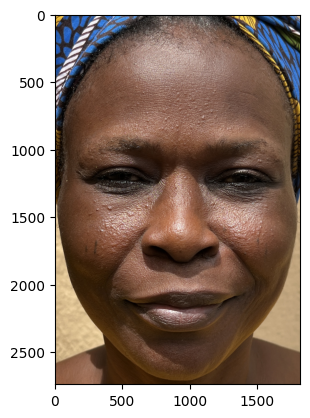

In [ ]:
real_prediction('53_1_1_20180113184110993.jpg')

Predicted Age: 72 | Actual Age: 80


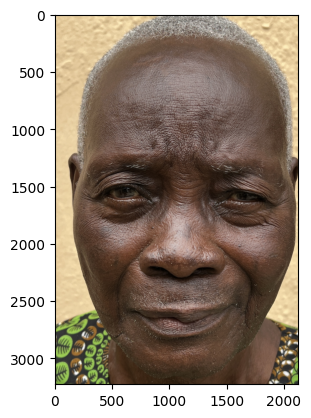

In [ ]:
real_prediction('80_0_1_20180113184110992.jpg')